Proyek Pertama Machine Learning Terapan

Nama : Sean Julius Lase

SIB Email : M011X0096@dicoding.org

Domisili : Jatinangor, Sumedang, Jawa Barat

Tahap pertama, Mendeklarasikan atau import library yang dibutuhkan dalam proses pembuatan proyek. semua import disatukan dalam 1 cell agar saat cell di compile program berjalan lebih rapih dan tidak mengganggu compiling dan debugging algoritma lain.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Selanjutnya membuat syntax untuk memanggil dataset yang akan digunakan (data loading). dataset diambil dari kaggle dengan link : https://www.kaggle.com/datasets/aigamer/movie-lens-dataset?select=movies.csv , dengan search engine : recommendation systems. Dataset yang digunakan adalah dataset dari rating film. dataset diupload ke google drive pribadi, dan dipanggil dengan mendeklarasikan ulang path nya pada variable yang telah dibuat (movie dan ratings), dengan menggunakan lib pandas untuk membaca dataset dalam bentuk .csv. dataset yang dipanggil ada dua untuk kemudian digabungkan dalam penggunaannya dikarenakan ada beberapa kolom yang diperlukan. data yang digunakan berasal dari sumber yang sama.

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Dataset_2/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Dataset_2/ratings.csv')

Pendeklarasian variabel movies untuk mencari tahu informasi tentang baris x kolom yang dimiliki oleh dataset, dan diketahui ada 9742 baris x 3 kolom yang masing masing nilainya di tunjukan seperti hasil output dibawah. terdapat kolom movieId, title, dan genres.

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Pendeklarasian variabel ratings untuk mencari tahu informasi tentang baris x kolom yang dimiliki oleh dataset ini, dan diketahui ada 100836 baris x 2 kolom yang masing masing nilainya di tunjukan seperti hasil output dibawah. terdapat kolom movieId, userId, title, dan timestamp.

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Pada syntax dibawah , dilakukan pengecekan jumlah total data yang terdapat pada kolom movieID di kedua variabel dengan menggunakan fungsi len(var.col.unique()). fungsi len digunakan untuk memberikan nilai integer total jumlah data pada variabel yang dideklarasikan. disebut bahwa terdapat 9742 id film pada variabel movies dan 9724 id film pada variabel ratings. 

In [ ]:
print('Jumlah film pada data movies: ', len(movies.movieId.unique()))
print('Jumlah film pada data ratings: ', len(ratings.movieId.unique()))

Jumlah film pada data movies:  9742
Jumlah film pada data ratings:  9724


Selanjutnya masuk ke tahap EDA atau Exploratory Data Analysis untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. pada bagian ini adalah deskripsi variabel yang didapat dari informasi yang disediakan pada dataset. yang akan di eskplorasi adalah 4 jenis dataset yaitu movies.genres , movies.movieId, ratings.userId, dan ratings.movieId. Eksplorasi data ini termasuk kedalam univariate analysis. 

movies.info() dideklarasikan untuk mencari tahu tipe data yang ada pada dataset, diketahui bahwa ada 1 data tipe int64 dan 2 data tipe object.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Kemudian mendeklarasikan kembali fungsi len untuk mengetahui banyak data atas variable movie untuk kolom genres, dan didapatkan sekitar 951 jenis genre film berbeda baik yang campuran maupun single-genre. setelahnya mendeklarasikan kolom genres untuk melihat genre apa saja yang ada pada dataset.

In [ ]:
print('Banyak data: ', len(movies.movieId.unique()))
print('Jumlah Genre film yang ada pada data : ', len(movies.genres.unique()))
print('Genre film yang ada pada data : ', movies.genres.unique())

Banyak data:  9742
Jumlah Genre film yang ada pada data :  951
Genre film yang ada pada data :  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Roman

Masih dalam tahap EDA atau Exploratory Data Analysis , pada syntax ini dideklarasikan kembali fungsi .info() pada ratings.

ratings.info() dideklarasikan untuk mencari tahu tipe data yang ada pada dataset, diketahui bahwa ada 1 data tipe float64 dan 3 data tipe int64.

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Untuk dianalisis dan dipahami lebih jauh digunakan kembali fungsi len pada kolom userId di variabel ratings dan didapat bahwa ada total 610 user yang memberikan penilaian terhadap film tertentu, dan total seluruh data rating terdapat 100836 rate dari user untuk total 9724 film yang ada pada dataset.

In [ ]:
print('Jumlah seluruh user: ', len(ratings.userId.unique()))
print('Jumlah seluruh film pada ratings: ', len(ratings.movieId.unique()))
print('Jumlah data rating: ', len(ratings))

Jumlah seluruh user:  610
Jumlah seluruh film pada ratings:  9724
Jumlah data rating:  100836


dilakukan deklarasi terhadap bentuk matriks (shape) dari variabel movies dengan syntax seperti pada dibawah ini, diketahui matriks memiliki besar 9742 x 3.

In [ ]:
print(movies.shape)

(9742, 3)


fungsi var.head() adalah untuk menampilkan secara otomatis 5 data teratas dari dataset, untuk var nya sendiri pada kasus ini adalah variabel movies, dengan hasil output seperti pada dibawah.

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Kemudian memanggil fungsi describe() yang memberikan informasi statistik pada masing-masing kolom, dimana Count  adalah jumlah sampel pada data. Mean adalah nilai rata-rata. Std adalah standar deviasi. Min yaitu nilai minimum setiap kolom.  25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah). 75% adalah kuartil ketiga. Max adalah nilai maksimum.

In [ ]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [ ]:
# # Definisikan dataframe rating ke dalam variabel all_movie_rate
# all_movie_rate = ratings
# all_movie_rate

Masuk kedalam tahap preprosesing data, dimulai dari mencari missing value. untuk memastikan kembali tidak ada data kosong maka digunakan fungsi .isna().sum() digunakan untuk mencari jumlah data yang tidak memiliki nilai, atau data kosong (NULL/NaN). dan dapat dilihat dari hasil output dibawah, bahwa tidak ada data kosong atau missing value.

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

Data yang dimiliki tidak diperlukan adanya prosesing lebih lanjut dikarenakan data yang dimiliki sudah cukup bagus dan tidak perlu untuk diconcantenate atau digabung dengan data lainnya sehingga mempermudah tahapan tersebut. 

Kemudian dilanjutkan kembali dengan tahap persiapan data yang mana membuat variabel preparation untuk menyimpan nilai variabel movies. Kemudian menggunakan fungsi drop_duplicates. data yang digunakan adalah data unik untuk dimasukkan ke dalam proses pemodelan. Oleh karena itu, diperlukan untuk menghapus data yang duplikat dengan fungsi drop_duplicates(). Dalam hal ini, yang akan dibuang adalah data duplikat pada kolom movieId. 

In [ ]:
preparation = movies
preparation = preparation.drop_duplicates('movieId')
preparation

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Selanjutnya, diperlukan untuk melakukan konversi data yang mana dataseries untuk diubah kebentuk list. Dalam hal ini, digunakan fungsi tolist() dari library numpy. kemudian untuk mengecek jumlah total data digunakan kembali fungsi len.

In [ ]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()
 
# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()
 
print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

9742
9742
9742


Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada data movei_id, movie_name, dan movie_genre yang telah disiapkan sebelumnya. data kemudian dideklarasikan dan disimpan dalam variabel data_new.

In [ ]:
data_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
data_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Data disimpan kembali kedalam variabel "data" untuk memudahkan proses pemanggilan variabel. Untuk mengecek kembali data yang akan digunakan dalam tahapan pemodelan bisa digunakan fungsi data.sample(x) , dimana nilai x adalah total jumlah data teratas yang ingin dilihat.

In [ ]:
data = data_new
data.sample(5)

,id,movie_name,genre
5294,8771,Sherlock Holmes: Terror by Night (1946),Crime|Mystery|Thriller
116,141,"Birdcage, The (1996)",Comedy
2088,2775,Head On (1998),Drama
3048,4082,Barfly (1987),Comedy|Drama|Romance
4265,6222,Prozac Nation (2001),Drama


Pada tahap ini, akan dibangun sebuah model sistem rekomendasi sederhana berdasarkan genre yang dimiliki oleh film. 

Digunakan 2 teknik berbeda yaitu CBF (Content Based Filtering) dan Collaborative Filtering.

Teknik yang akan diimplementasikan pertama kali adalah CBF dengan TF-IDF Vectorizer. Teknik tersebut akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori film. Skor dalam TF-IDF digunakan untuk mengamati istilah-istilah berbeda yang mengandung informasi penting dalam dokumen tertentu.

In [ ]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(data['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']


Selanjutnya, melakukan fit dan transformasi ke dalam bentuk matriks, 
Metode ini akan mentransformasi dokumen ke dalam document-term matrix. dan dapat dilihat besar matriksnya adalah 9742 x 24. Nilai 9742 merupakan ukuran data dan 24 merupakan matrik kategori film. 

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(9742, 24)

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense(). Objek matriks dengan bentuk yang sama dan berisi data yang sama yang diwakili oleh matriks sparse, dengan urutan memori yang diminta. Jika out dilewatkan dan merupakan array (bukan numpy.matrix), dan akan diisi dengan nilai yang sesuai dan dikembalikan dalam objek numpy.matrix yang berbagi memori yang sama.

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.41684567, 0.51622547, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51236121, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57860574, 0.        , 0.81560738, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Selanjntunya adalah Membuat dataframe untuk melihat tf-idf matrix yang telah dirancang. Kolom diisi dengan genre film dan Baris diisi dengan nama film. dengan total 20 sampel genre, dan 10 sampel film.

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.movie_name
).sample(20, axis=1).sample(10, axis=0)

,listed,children,crime,imax,genres,fi,film,documentary,sci,thriller,action,romance,horror,animation,comedy,musical,mystery,western,war,noir
movie_name,,,,,,,,,,,,,,,,,,,,
"Love Song for Bobby Long, A (2004)",0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
BlinkyTM (2011),0.0,0.000000,0.000000,0.0,0.0,0.577231,0.0,0.0,0.577231,0.000000,0.000000,0.000000,0.577589,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Nymphomaniac: Volume II (2013),0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.904775,0.0,0.0,0.0
"Divo, Il (2008)",0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Help! (1965),0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407992,0.912986,0.000000,0.0,0.0,0.0
Ocean's Twelve (2004),0.0,0.000000,0.590181,0.0,0.0,0.000000,0.0,0.0,0.000000,0.503034,0.509796,0.000000,0.000000,0.000000,0.372494,0.000000,0.000000,0.0,0.0,0.0
"Freddy's Dead: The Final Nightmare (Nightmare on Elm Street Part 6: Freddy's Dead, A) (1991)",0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Berlin Calling (2008),0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.734632,0.000000,0.000000,0.0,0.0,0.0
Wallace & Gromit: The Wrong Trousers (1993),0.0,0.574316,0.482306,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.587262,0.304409,0.000000,0.000000,0.0,0.0,0.0


Setelah berhasil mengidentifikasi representasi fitur penting dari setiap kategori film dengan fungsi tfidfvectorizer. juga telah dihasilkan matriks yang menunjukkan korelasi antara jenis genre dan film. Selanjutnya, dihitung derajat kesamaan antara satu film dengan film lainnya untuk menghasilkan film apa yang akan direkomendasikan. 

Sekarang, kakan dihitung derajat kesamaan (similarity degree) antar film dengan menggunakan teknik cosine similarity. fungsi yang digunakan aalah cosine_similarity(tf-idf matrix). sehingga kita dapat melihat kesamaan antar film.

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.81357774, 0.15276924, ..., 0.        , 0.4210373 ,
        0.26758648],
       [0.81357774, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15276924, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57091541],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.4210373 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26758648, 0.        , 0.57091541, ..., 0.        , 0.        ,
        1.        ]])

Selanjutnya, bisa dilihat matriks kesamaan setiap resto dengan menampilkan nama restoran dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Dengan menggunakan cosine similarity, kesamaan antara film yang satu dengan dengan yang lainnya berhasil teridentifikasi. 

Shape yang dihasilkan dengan nilai (9742, 9742) merupakan ukuran matriks similarity dari data yang dimiliki. Yang artinya, tingkat kesamaan pada 9742 film telah diidentifikasi, Tapi tentu tidak bisa ditampilkan semuanya. Oleh karena itu, hanya dipilih 10 film pada baris vertikal dan 5 film pada sumbu horizontal seperti pada contoh di bawah. 

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['movie_name'], columns=data['movie_name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9742, 9742)


movie_name,12 Years a Slave (2013),Comic-Con Episode IV: A Fan's Hope (2011),Croupier (1998),Pushing Hands (Tui shou) (1992),"What's Up, Doc? (1972)"
movie_name,,,,,
"Best Little Whorehouse in Texas, The (1982)",0.309079,0.0,0.155649,0.309079,0.334666
Wizards of Waverly Place: The Movie (2009),0.225369,0.0,0.113494,0.225369,0.244026
"Inbetweeners 2, The (2014)",0.000000,0.0,0.000000,0.000000,1.000000
Spanglish (2004),0.466405,0.0,0.234877,0.466405,0.505015
Angels and Insects (1995),0.540377,0.0,0.272128,0.540377,0.000000
"Scanner Darkly, A (2006)",0.231293,0.0,0.116477,0.231293,0.000000
"Whistleblower, The (2010)",0.564498,0.0,0.284276,0.564498,0.000000
Welcome to the Dollhouse (1995),0.678466,0.0,0.341669,0.678466,0.734632
Bring It On: In It To Win It (2007),0.000000,0.0,0.000000,0.000000,1.000000


Pada tahap ini, dibuat fungsi film_recommendations dengan beberapa parameter sebagai berikut:

Nama_film : Nama film yang ada(index kemiripan dataframe).
Similarity_data : Dataframe mengenai similarity yang telah didefinisikan sebelumnya.
Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah movie_name dan genre.
k : Banyak rekomendasi yang ingin diberikan.

Pada fungsi ini, akan diambil k dengan nilai similarity terbesar pada index matrix yang diberikan (i).

Fungsi argpartition, akan mengambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini akan dimasukkan ke dalam variabel closest. 

In [ ]:
def movie_recommendations(nama_film, similarity_data=cosine_sim_df, items=data[['movie_name', 'genre']], k=5):
    
    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_film agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Setelah model selesai, dapat dicoba dengan menyebutkan salah satu nama film yang ada untuk menemukan rekomendasi film yang mirip dengan Spiderman 3(2007).

In [ ]:
data[data.movie_name.eq('Spider-Man 3 (2007)')]

,id,movie_name,genre
6470,52722,Spider-Man 3 (2007),Action|Adventure|Sci-Fi|Thriller|IMAX


Perhatikanlah, spider-man 3 masuk dalam kategori genre Action|adventure|scifi|thriller|IMAX. dan dari hasil rekomendasi yang akan dicoba diharapkan memberikan rekomendasi film dengan kategori yang mirip. 

untuk mencoba medapatkan film recommendation bisa dengan memanggil fungsi yang telah didefinisikan sebelumnya bersama dengan nama film yang telah disebutkan. kemudian didapatkan hasil seperti dibawah ini. 

In [ ]:
# Mendapatkan rekomendasi restoran yang mirip dengan spiderman3
movie_recommendations('Spider-Man 3 (2007)')

,movie_name,genre
0,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
1,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
2,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
3,G.I. Joe: Retaliation (2013),Action|Adventure|Sci-Fi|Thriller|IMAX
4,Godzilla (2014),Action|Adventure|Sci-Fi|IMAX


Selanjutnya akan menggunakan model collabortive filtering. Teknik ini membutuhkan data rating dari user. 

Dari data rating pengguna,akan di identifikasi film-film yang mirip dan belum pernah dikunjungi oleh pengguna untuk kemudian direkomendasikan. 

Selanjutnya, adalah melakukan load data dan membaca file rating yang sudah pernah dideklarasikan diawal. namun agar tidak tertukar dan tertiban memorinya, namanya kaan dirubah, nama variabel rating diubah menjadi df. seperti pada hasil dibawah ini.

total data adalah 100836 baris x 4 kolom.

In [ ]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Setelahnya masuk kedalam tahap preprocessing data. Pada tahap ini,  diperlukan untuk melakukan persiapan data untuk menyandikan (encode) fitur ‘userId’ dan ‘movieId’ ke dalam indeks integer. hasil dari encode adalah seperti pada dibawah.

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Sama halnya dengan userID, untuk MovieID juga harus diencode, mengubah movieId menjadi list dan dilakukan proses encoding angka ke movieID.

In [ ]:
# Mengubah MovieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

Selanjutnya adalah melakukan mapping atas userId dan MovieId yang udah diencode ke dataframe user dan dataframe movie yang sudah dideklarasikan.

In [ ]:
# Mapping userId ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

Sebelum masuk ketahap pemodelan data, dilakukan pengecekan terhadap beberapa hal dalam data seperti jumlah user, jumlah film, nilai rating paling rendah, nilai rating paling tinggi, dan mengubah nilai rating menjadi float. hasil dapat dilihat sperti dibawah.

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah film
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Movies: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Movies: 9724, Min Rating: 0.5, Max Rating: 5.0


Selanjutnya adalah mengacak dataset. sebelum membagi dataset atau mengsplit dataset menjadi data training dan validasi. dataset akan diacak terlebih dahulu agar distribusinya menjadi random. randomstate ditentukan dengannilai 42. frac adalah nilai float, Pengembalian (nilai float * panjang nilai data).

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


Tahap selanjutnya, adalah membagi data train dan validasi dengan komposisi 80:20. Namun sebelum dibagi, perlu ada pemetaan (mapping) data user dan film menjadi satu value terlebih dahulu. Lalu, membuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


Selanjutnya akan masuk kedalam tahap pelatihan, namun sebelumnya akan dibuat class RecommenderNet dengan keras Model class.  model akan menghitung skor kecocokan antara user dan film dengan teknik embedding. Pertama, akan dilakukan proses embedding terhadap data user dan film. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan film. Selain itu, juga dapat menambahkan bias untuk setiap user dan film. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-3)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-3)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Setelah selesai membuat model, masuk kedalam compiling model yang sudah diinisialisasi. Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation. 

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Setelah selesai mengkompile, akan dilakukan proses training data menggunakan fungsi model.fit yang disimpan kedalam memori variabel history. model akan dilatih sebanyak 50 kali epoch, dan batch size sebesar 16.

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
5042/5042 [==============================] - 25s 4ms/step - loss: 0.6476 - root_mean_squared_error: 0.2353 - val_loss: 0.6182 - val_root_mean_squared_error: 0.2123
Epoch 2/50
5042/5042 [==============================] - 21s 4ms/step - loss: 0.6068 - root_mean_squared_error: 0.2012 - val_loss: 0.6057 - val_root_mean_squared_error: 0.1995
Epoch 3/50
5042/5042 [==============================] - 21s 4ms/step - loss: 0.5981 - root_mean_squared_error: 0.1920 - val_loss: 0.6024 - val_root_mean_squared_error: 0.1961
Epoch 4/50
5042/5042 [==============================] - 21s 4ms/step - loss: 0.5944 - root_mean_squared_error: 0.1881 - val_loss: 0.6010 - val_root_mean_squared_error: 0.1947
Epoch 5/50
5042/5042 [==============================] - 21s 4ms/step - loss: 0.5923 - root_mean_squared_error: 0.1857 - val_loss: 0.6003 - val_root_mean_squared_error: 0.1939
Epoch 6/50
5042/5042 [==============================] - 21s 4ms/step - loss: 0.5908 - root_mean_squared_error: 0.1840 - val_l

Setelah model selesai dilatih akan dilakukan plotting pada model rekomendasinet yang telah dibuat berdasarkan nilai rmse dan valrmse yang dihasilkan selama proses training. Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 50. Dari proses ini, dapat diperoleh nilai error akhir sebesar sekitar 0.5829 dan error pada data validasi sebesar 0.1967. Nilai tersebut cukup bagus untuk sistem rekomendasi.

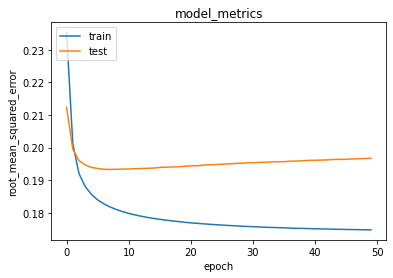

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Untuk mendapatkan rekomendasi film, akan diambil sampel user secara acak dan definisikan variabel movie_not_watched yang merupakan daftar film yang belum pernah ditonton oleh pengguna. Hal ini dipeprlukan mengingat daftar movie_not_watched inilah yang akan menjadi film yang direkomendasikan. 

Sebelumnya, pengguna telah memberi rating pada beberapa film yang telah mereka kunjungi. rating ini akan digunakan untuk membuat rekomendasi film yang mungkin cocok untuk pengguna. film yang akan direkomendasikan tentulah film yang belum pernah dikunjungi oleh pengguna. Oleh karena itu, perlu membuat variabel movie_not_watched sebagai daftar film untuk direkomendasikan pada pengguna.

Variabel movie_not_watched diperoleh dengan menggunakan operator bitwise (~) pada variabel movie_watched_by_user.

In [ ]:
movie_df = data_new
df = pd.read_csv('/content/drive/MyDrive/Dataset_2/ratings.csv')
 
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

Selanjutnya, untuk memperoleh rekomendasi film, gunakan fungsi model.predict() dari library Keras dengan menerapkan model.predict(), hasil dari prediksi latihan akan merekomendasikan film yang sesuai dengan user yang tertera atau sampel user yang digunakan. hasilnya seperti pada dibawah ini.

In [ ]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movies with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)
 
print('----' * 8)
print('Top 10 movies recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

Showing recommendations for users: 509
Movies with high ratings from user
--------------------------------
Great Dictator, The (1940) : Comedy|Drama|War
Lord of the Rings: The Fellowship of the Ring, The (2001) : Adventure|Fantasy
Lord of the Rings: The Two Towers, The (2002) : Adventure|Fantasy
Lord of the Rings: The Return of the King, The (2003) : Action|Adventure|Drama|Fantasy
Pitch Perfect 2 (2015) : Comedy
--------------------------------
Top 10 movies recommendation
--------------------------------
Heidi Fleiss: Hollywood Madam (1995) : Documentary
Paths of Glory (1957) : Drama|War
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976) : Comedy
Stunt Man, The (1980) : Action|Adventure|Comedy|Drama|Romance|Thriller
Belle époque (1992) : Comedy|Romance
Trial, The (Procès, Le) (1962) : Drama
Adam's Rib (1949) : Comedy|Romance
Bad Boy Bubby (1993) : Drama
Enter the Void (2009) : Drama
Band of Brothers (2001) : Action|Drama|War


model berhasil memberikan rekomendasi kepada user. Sebagai contoh, hasil di atas adalah rekomendasi untuk user dengan id 509. Dari output tersebut, kita dapat membandingkan antara film with high ratings from user dan Top 10 movies recommendation untuk user.